In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [3]:
df = pd.read_csv('employee_performance.csv')

# **Part B - Practical (Python Programming)**

## **Step 1: Central Tendency & Dispersion**

 • Find mean, median, and mode of Salary.

 • Calculate variance and standard deviation of Projects_Completed.

In [4]:
# Finding mean,median,Mode of Salary.

mean_salary = df['Salary'].mean()
median_salary = df['Salary'].median()
mode_salary = df['Salary'].mode()[0]

print(f"Mean of Salary is {mean_salary:.2f}")
print(f"Median of Salary is {median_salary:.2f}")
print(f"Mode of Saalry is {mode_salary}")

Mean of Salary is 72497.67
Median of Salary is 72958.50
Mode of Saalry is 25255


In [5]:
# Calculating Variance and Standard Deviation of project_completed.

variance_project_completed = df['Projects_Completed'].var()
std_project_completed = df['Projects_Completed'].std()

print(f"Variance of Project Completed is: {variance_project_completed:.2f}")
print(f"Standard Deviation of Project Completed is: {std_project_completed:.2f}")

Variance of Project Completed is: 30.39
Standard Deviation of Project Completed is: 5.51


## **Step 2: Probability & Events**

• Find the probability of employees getting promoted.

• Create a contingency table between Promotion_Status and Department.

• Compute conditional probability: P(Promotion | Performance_Score > 80).

In [13]:
# Finding the probability of employees getting promoted.
prob_promotion = (df['Promotion_Status'] == 'Yes').mean()
print(f"Probability of employees getting promoted are: {prob_promotion*100:.2f} %")
print("----------------------------")

# Creating a Contingency Table Between Promotion_Status and Department.
contingency_table = pd.crosstab(df['Promotion_Status'],df['Department'])
print("Contingency Table:")
print(contingency_table)
print("----------------------------")

# Compute Conditional Probability.
cond_probability = (df.loc[df['Performance_Score']>80 , 'Promotion_Status'] == 'Yes').mean()
print(f"P(Promotion | Performance_Score > 80): {cond_probability*100:.2f}%") 

Probability of employees getting promoted are: 27.95 %
----------------------------
Contingency Table:
Department        Finance   HR   IT  Marketing  Sales
Promotion_Status                                     
No                    543  604  568        591    576
Yes                   225  225  209        218    241
----------------------------
P(Promotion | Performance_Score > 80): 26.45%


## **Step 3: Distributions & Visualization**

• Plot a Histogram of Performance_ Score with a Gaussian curve.

• Check Skewness and Kurtosis for Salary.

• Draw a Q-Q Plot of Projects_Completed.

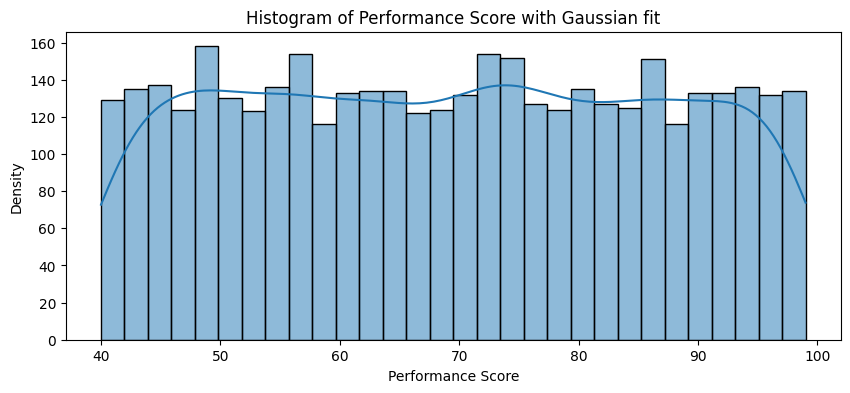

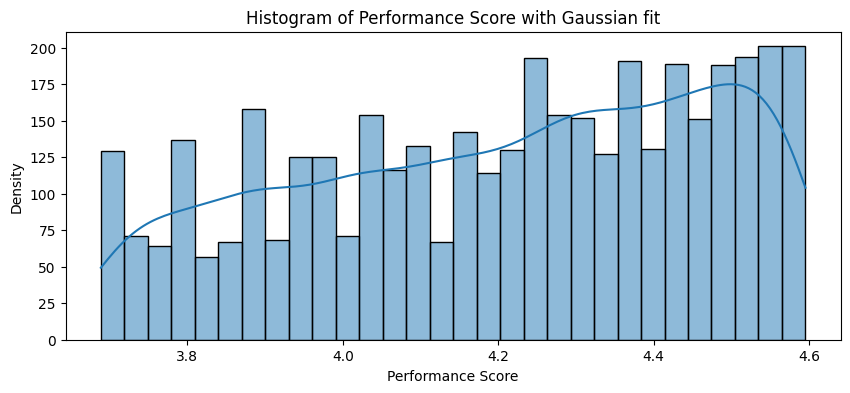

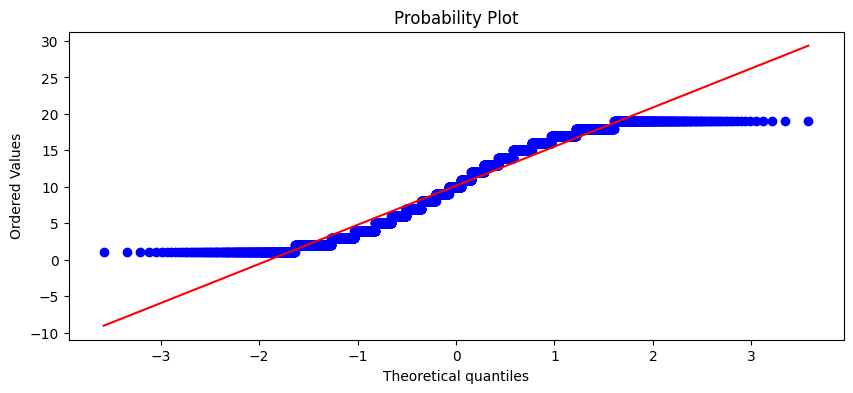

Skewness of the Salary: -0.02
Kurtosis of the Salary: -1.21


In [25]:
# Creating a normal distribution curve or gaussian curve.
# Before Transformation  
plt.figure(figsize=(10,4))
sns.histplot(df['Performance_Score'], kde=True, bins=30)
plt.title('Histogram of Performance Score with Gaussian fit')
plt.xlabel('Performance Score')
plt.ylabel('Density')
plt.show()

# After Transformation
plt.figure(figsize=(10,4))
sns.histplot(np.log(df['Performance_Score']) , kde=True, bins=30)
plt.title('Histogram of Performance Score with Gaussian fit')
plt.xlabel('Performance Score')
plt.ylabel('Density')
plt.show()

# Creating the Q-Q plot
plt.figure(figsize=(10,4))
st.probplot(df["Projects_Completed"],dist="norm",plot=plt)
plt.show()

# Checking Skewness and kurtosis for salary.
skewness_salary = df['Salary'].skew()
kurtosis_salary = df['Salary'].kurtosis()
print(f"Skewness of the Salary: {skewness_salary:.2f}")
print(f"Kurtosis of the Salary: {kurtosis_salary:.2f}")


## **Step 4: Linear Algebra Application**
Take the first 5 employees's [Projects_Completed, Working_Hours] as vectors.

• Perform dot product between two employee vectors.

• Find Norm 1 & Norm 2 of an employee's work vector.

• Compute the angle between two employees's  work vectors.


In [31]:
vecs = df[['Projects_Completed', 'Working_Hours']].head(5).to_numpy()

# Dot Product between 2 employee vectors.
emp_1 = vecs[0]
emp_2 = vecs[1]
dot_product = np.dot(emp_1,emp_2)
print(f"Dot Product Between the 2 employees are: {dot_product}")


Dot Product Between the 2 employees are: 2658


In [32]:
# Finding Norm 1 & Norm 2
# Norm 1 or Manhattan Norm
norm_1 = np.linalg.norm(emp_1 , ord=1)
print(f"Norm 1 or Manhattan Norm for employees's work vector is: {norm_1}")
print("-------------------------------------------------------")

# Norm2 or Euclidean Norm 
norm_2 = np.linalg.norm(emp_1, ord=2)
print(f"Norm 2 or Euclidean Norm for employees's work vector is: {norm_2:.2f}")

Norm 1 or Manhattan Norm for employees's work vector is: 54.0
-------------------------------------------------------
Norm 2 or Euclidean Norm for employees's work vector is: 48.37


In [35]:
# Computing The angle between 2 employees vector.
norm_emp1 = np.linalg.norm(emp_1, ord=2)
norm_emp2 = np.linalg.norm(emp_2, ord=2)

# Finding the cosine.
cos_thetha = dot_product/(norm_emp1*norm_emp2)

# Finding the radians.
theta_rad = np.arccos(cos_thetha)

# Convert to degree.
degree = np.degrees(theta_rad)

print(f"Angle between the 2 employees work vector is (Degrees): {degree:.2f}")

Angle between the 2 employees work vector is (Degrees): 4.39
